## Линейные модели

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
np.random.seed(7)

### 1. Парная регрессия

В первой части вам нужно при помощи библиотеки NumPy сгенерировать данные и построить по ним уравнение парной линейной регерессии. Для генерации данных вам нужно определить значения параметров регрессионной модели  𝑘  и  𝑏 , а также размер выбоки  𝑛 . Устанавливаемые вами значения  𝑘  и  𝑏  можно считать «истинными» значениями генеральной совокупности.

In [2]:
k = 0.07 
b = -14.3
n = 1000

Теперь можно сгенерировать значения фактора  𝑥 , воспользовавшись функцией `np.random.normal`, а затем вычислить значения целевой переменной  𝑦  как  𝑦=𝑘𝑥+𝑏+𝜖 , где  𝜖  – случайное отклонение, для генерации которого также можно воспользоваться функцией `np.random.normal`.

In [138]:
X = np.random.normal(0, 1, 1000)
eps = np.random.normal(0, 0.1, 1000)
y = [k*x + b + e for x, e in zip(X, eps)]

Постройте диаграмму рассеяния данных (поле корреляции). Для этого можно воспользоваться функцией scatter библиотеки matplotlib.

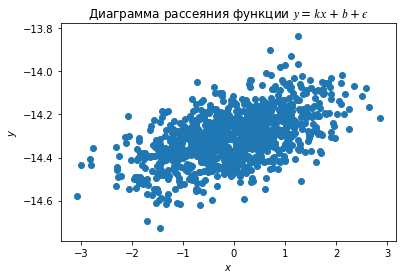

In [7]:
plt.scatter(X, y)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Диаграмма рассеяния функции $𝑦=𝑘𝑥+𝑏+𝜖$");

Вычислите ковариацию. Не используйте встроенную функцию `np.cov`, вычислите по формуле выборочной ковариации.

In [8]:
def covariance(x, y):
    n = len(x)
    return np.dot((x - np.mean(x)), (y - np.mean(y))) / (n - 1)

print("COV(X, y) = {:.4f}".format(covariance(X, y)))

COV(X, y) = 0.0623


Вычислите коэффициент корреляции Пирсона $r_{xy}$. Не используйте встроенную функцию `np.corrcoef`. Вычислите по формуле, используя полученное на предыдущем шаге значение ковариации.

*Подсказка: для вычисления стандартного отклонения можно воспользоваться функцией `np.std`, но будьте осторожны, обратите внимание на параметр `ddof`.*

In [9]:
corr = covariance(X, y) / (np.std(X, ddof=1) * np.std(y, ddof=1))
print("Corr(X, Y) = {:.2f}".format(corr))

Corr(X, Y) = 0.54


Вычислите оценки параметров регрессии с использованием МНК. 

*Подсказка: Вычисление оценок параметров регресси сводится к решению системы $X^T X P = X^T Y$, где $P$ - вектор-столбец искомых параметров. Для решения системы можно использовать функции `np.linalg.inv` и `np.linalg.solve`.*

In [10]:
def matrix_equation(X, y):
    a = np.dot(X.T, X)
    b = np.dot(X.T, y)
    return np.linalg.solve(a, b)

In [11]:
x_np = np.hstack((np.ones((X.shape[0], 1)), X[:, np.newaxis]))
p = matrix_equation(x_np, y)
p

array([-14.30457166,   0.06720889])

Вычислите коэффициент детерминации $R^2$, воспользовавшись двумя формулами: как квадрат коэффициента корреляции и через отношение остаточной дисперсии к общей дисперсии целевой переменной.

In [15]:
# RS = np.corrcoef(X, y)[0,1] ** 2
r_squared = corr ** 2; # корреляция была расчитана на одном из предыдущих шагов
print(f"{r_squared:.4f}")

0.2895


In [155]:
bp, kp = p
y_predicted = X * kp + bp
mean_y = np.mean(y)
SST = np.sum((y - mean_y) ** 2)
SSR = np.sum((y_predicted - mean_y) ** 2)
r_squared = SSR / SST
print(f"{r_squared:.4f}")

0.2895


Постройте линию регрессии на поле корреляции. 

*Подсказка: для построения линии можно воспользоваться функцией [plot](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html) библиотеки matplotlib.*

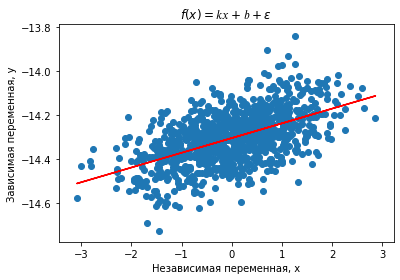

In [17]:
plt.plot(X, y_predicted, linestyle='solid', color='red')
plt.scatter(X, y);
plt.ylabel('Зависимая переменная, y')
plt.xlabel('Независимая переменная, x')
plt.title("$f(x) = 𝑘𝑥 + 𝑏 + \epsilon$");

Вычислите [среднюю ошибку аппроксимации](http://univer-nn.ru/ekonometrika/koefficient-korrelyacii-srednyaya-oshibka-approksimacii-koefficient-elastichnosti/). Эта величина показывает, на сколько процентов в среднем расчётное значение целевой переменной отличается от фактического.

In [18]:
a = np.sum(abs(y - y_predicted)) / n * 100
print("Средняя ошибка аппроксимации: {:.2f} %".format(a)) # не должна превышать 10%

Средняя ошибка аппроксимации: 8.05 %


Оцените статистическую значимость уравнения регресии при помощи F-критерия. Для вычисления значения F-критерия вы можете воспользоваться формулой $F = \frac{SSM}{SSE} \frac{n-k-1}{k}$, где $n$ – количество наблюдений в выборке, $k$ – количество факторов, включенных в модель (для парной регрессии $k=1$). Используйте значение уровня значимости $\alpha = 0,05$.

*Подсказка: для вычисления $P(X > F)$ можно воспользоваться функцией [`scipy.stats.f.sf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f.html) библиоткеки scipy.*

$SSM = \sum{(\hat{y}-\bar{y})^2}$, $df_r = p - 1$ ($p$ — количество факторов)

$SSE = \sum{(\hat{y}- y_i)^2}$, $df_e = n - p$

$MSr = \dfrac{SSM}{df_r}$, $MSe = \dfrac{SSE}{df_e}$

Если линейной зависимости нет, то $β_1 = 0$, и тогда
$MSr = MSe$
 - $H_0 : β_1 = 0$
 - $H_A : β_1 = 0$

$F_{df_r,df_e} = \dfrac{MSr}{MSe}$

Для простой линейной регрессии $df_r = 1$ и $df_e = n − 2$

In [158]:
df1 = 1
df2 = n - m - 1 # m - количество факторов в модели
f_stat = (r_squared / (1 - r_squared)) * (df2 / df1)
f_stat

406.7116009595672

In [21]:
from scipy.stats import f

In [105]:
alpha = .05
# F = np.var(X, ddof=1) / np.var(y, ddof=1)
# df1 = n - 1 
# df2 = n - 1
p_value = f.sf(f_stat, 1, 998) # round(1 - scipy.stats.f.cdf(F, df1, df2)) or stats.f_oneway(X, y)[1]
p_value < alpha

True

**Вывод:** взаимосвязь зависимой и независимой переменных в уравнении регрессии статистически значима ($F_{1,998} = 406.711, p = 0.0$).

Вычислите стандартную ошибку коэффициента регресии и оцените его статистическую значимость при помощи t-критерия Стьюдента. Используйте значение уровня значимости $\alpha = 0,05$.

*Подсказка: стандартная ошибка $s_k$ коэффициента регрессии $k$ может быть найдена по формуле $s_k = \frac{\sigma_{ост}}{\sigma_x \sqrt{n - 1}}$ (формула 3.49 в [2]), а значение статистики $t = \frac{k}{s_k}$. Для вычисления $P(X > |t|)$ можно воспользоваться функцией [`scipy.stats.t.sf`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html) библиоткеки scipy. При использовании `np.std` обратите внимание на параметр `ddof`.*

In [24]:
s_k = ((np.sum((y - y_predicted) ** 2) / 
       (n - 2)) / np.sum((X - np.mean(X)) ** 2)) ** 0.5
t = kp / s_k
t 

20.167092030324312

In [25]:
stats.t.sf(t, df=n-2) < alpha

True

**Вывод:** в уравнении $\hat{y} = kx + b + \epsilon$
коэффициент регрессии $k$ статистически значимо отличается от 0  ($t_{0.05, 998} = 20.167, p = 0.0$)

Удостоверьтесь в правильности проведённых вычислений, проведя повторные рассчёты с помощью бибилиотеки [statsmodels](https://www.statsmodels.org/stable/index.html).

In [28]:
dat = pd.DataFrame([X, y]).T
dat.columns = ['X', 'y']

In [80]:
results = smf.ols('y ~ X', data=dat).fit()

In [30]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     406.7
Date:                Sun, 03 May 2020   Prob (F-statistic):           3.89e-76
Time:                        00:05:15   Log-Likelihood:                 870.45
No. Observations:                1000   AIC:                            -1737.
Df Residuals:                     998   BIC:                            -1727.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.3046      0.003  -4457.783      0.0

### 2. Множественная регрессия

Во второй части вам нужно построить модель множественной линейной регрессии, позволяющую предсказать процент бедного населения в регионе по набору социально-экономических показателей. Для построения модели предлагается использовать данные для 50 штатов США и округа Колумбия. В данных представлены следующие показатели.


1.   Процент населения, проживающего в крупных городах (metro_res).
2.   Процент населения европейского происхождения (white).
3. Процент людей со средним образованием (hs_grad).
4. Процент бедного населения (poverty).
5. Процент семей, в которых женщина является домохозяйкой (female_house).

In [31]:
df = pd.read_csv('http://d396qusza40orc.cloudfront.net/statistics/lec_resources/states.csv')
df.shape

(51, 6)

In [32]:
df.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


Выполните проверку данных на мультиколлинеарность. Постройте матрицу корреляции. На основе анализа матрицы корреляции определите, какие факторы нужно включить в регрессионную модель.

*Подсказка: для построения матрицы корреляции можно использовать функцию `pd.DataFrame.corr`.*

In [33]:
corr_matrix = df.corr()
corr_matrix

,metro_res,white,hs_grad,poverty,female_house
metro_res,1.000000,-0.342442,0.018110,-0.204235,0.300062
white,-0.342442,1.000000,0.238156,-0.308520,-0.751394
hs_grad,0.018110,0.238156,1.000000,-0.746858,-0.611867
poverty,-0.204235,-0.308520,-0.746858,1.000000,0.525397
female_house,0.300062,-0.751394,-0.611867,0.525397,1.000000


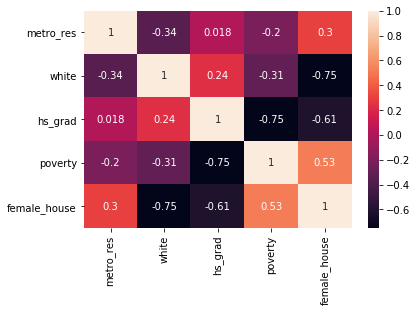

In [35]:
import seaborn as sns
sns.heatmap(df.corr(), cbar=True, annot=True);

In [36]:
X = np.hstack((df.drop(["poverty", "state", "female_house"], axis=1).values, np.ones((df.shape[0], 1))))
y = df.poverty.values
coefs = np.linalg.lstsq(X, y, rcond=None)[0]
print(coefs)

[-5.55318927e-02 -5.33270558e-02 -5.69724442e-01  6.87220151e+01]


In [45]:
y_hat = np.dot(X, coefs) # np.sum(coefs * X, axis=1)
y_hat

array([16.3223463 ,  9.686533  , 11.40441118, 15.39639191, 13.14230541,
        8.68491178,  9.44684892,  9.67049819, 12.24208445, 11.2091962 ,
       12.66280535, 11.83906311,  9.69226786, 10.66748447, 10.8253901 ,
        9.16399647,  9.51734637, 13.6347186 , 15.80279229, 11.97343927,
       10.53460321,  9.373282  , 10.3197666 ,  7.78794464, 16.48681828,
       10.01263571,  9.53813816,  8.20348787, 10.38762934,  7.82195733,
       10.24737617, 13.48316925, 11.96730522, 15.0518908 ,  9.58074724,
       10.18974475, 12.0895567 , 10.00050452, 10.83674659, 12.76971293,
       15.71835905, 10.56990936, 14.73368086, 15.69976521,  7.89932468,
       10.78480225, 10.70551155,  8.8464889 , 16.25861101,  9.64683359,
        8.26886498])

Вычислите [скорректированный коэффициент детерминации](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8#%D0%A1%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BA%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D0%B9_(adjusted)_'%22%60UNIQ--postMath-00000015-QINU%60%22') полученной регрессионной модели.

*Подсказка: скорректированный коэффициент детерминации можно вычислить по формуле $R^2_{adj} = 1 - \frac{SSE}{SST} \frac{n - 1}{n - k - 1}$.*

In [46]:
SS_Residual = sum((y - y_hat) ** 2)       
SS_Total = sum((y - np.mean(y)) ** 2)     
r_squared = 1 - (float(SS_Residual)) / SS_Total
adjusted_r_squared = 1 - (1 - r_squared)*(len(y) - 1) / (len(y) - X.shape[1] - 1)
r_squared, adjusted_r_squared

(0.6412396705699456, 0.6100431201847234)

In [47]:
from sklearn.feature_selection import f_regression

In [48]:
f_regression(X[:, :-1], y, center=False)[1] < alpha

array([ True,  True,  True])

Удостоверьтесь в правильности проведённых вычислений, проведя повторные рассчёты с помощью бибилиотеки [statsmodels](https://www.statsmodels.org/stable/index.html).

In [62]:
fit = smf.ols('poverty ~ hs_grad + metro_res + white - female_house - state', data=df).fit()

In [63]:
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                poverty   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     28.00
Date:                Sun, 03 May 2020   Prob (F-statistic):           1.55e-10
Time:                        01:01:52   Log-Likelihood:                -103.41
No. Observations:                  51   AIC:                             214.8
Df Residuals:                      47   BIC:                             222.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     68.7220      6.389     10.756      0.0

На основе анализа значений t-статистики, полученных на предыдущем шаге, определите, коэффициенты при каких факторах статистически значимо отклоняются от нуля.

__Вывод:__ Коэффициенты при всех исследуемых факторах статистически значимо отклоняются от нуля

### 3. Полиномиальная регрессия

В третьей части вам нужно построить регрессионную модель, в которой зависимость $y$ от $x$ имеет нелинейный характер. 

In [66]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
plt.rcParams['figure.figsize'] = (10, 7)

In [64]:
df = pd.read_csv('http://edu.std-900.ist.mospolytech.ru/files/nonlinear_data.csv')
x, y = df.x.values, df.y.values

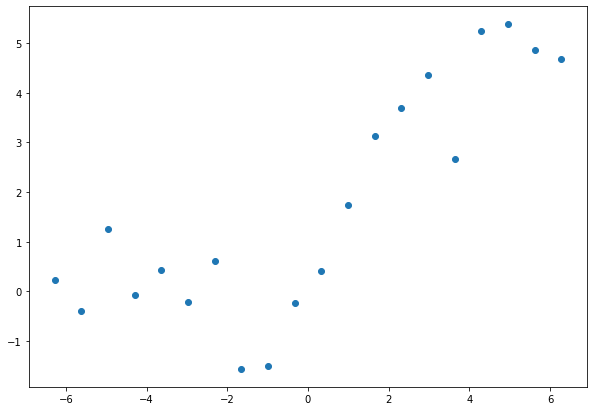

In [67]:
plt.scatter(x, y);

Вычислите оценки параметров регрессионных моделей с помощью МНК для полиномов степеней 1-15. Постройте графики получившихся кривых. Наблюдаются ли на графике сильно выраженные осцилляции (колебания)? Если наблюдаются, то начиная с какой степени полинома?

*Подсказка: в библиотеке `sklearn` есть удобный класс [`sklearn.preprocessing.PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html), который позволяет легко подготовить данные для построения полиномиальной регрессии.*

In [68]:
regr = LinearRegression()
degrees = list(range(1, 16))

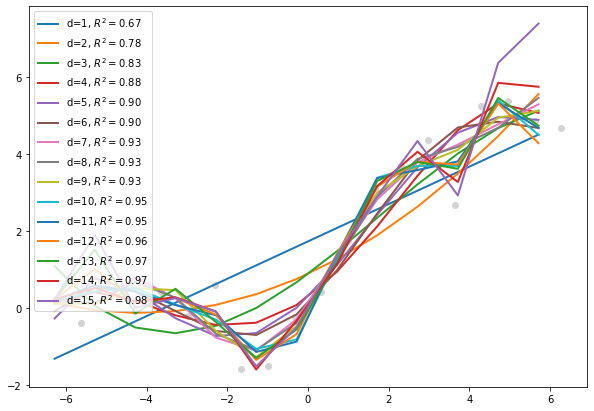

In [76]:
plt.scatter(x, y, color='lightgray');
for d in degrees:
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_fit = np.arange(x.min(), x.max(), 1)[:, np.newaxis]
    X_ = poly.fit_transform(x.reshape(-1, 1))
    regr = regr.fit(X_, y)
    y_fit = regr.predict(poly.fit_transform(X_fit))
    r2 = r2_score(y, regr.predict(X_))
    plt.plot(X_fit, y_fit, 
         label = f'd={d}, $R^2={r2:.2f}$', 
         lw = 2)
plt.legend(loc='upper left');

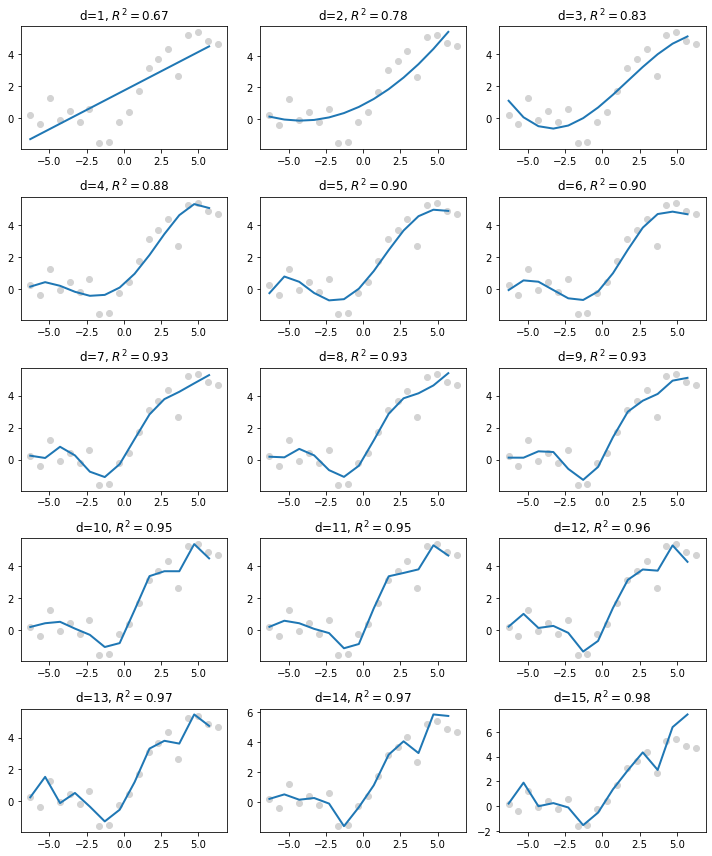

In [102]:
degrees = (x for x in range(1, 16))

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10, 12))
for row_axe in axes:
    for axe in row_axe:
        d = next(degrees)
        axe.scatter(x, y, color='lightgray');
        poly = PolynomialFeatures(degree=d, include_bias=False)
        X_fit = np.arange(x.min(), x.max(), 1)[:, np.newaxis]
        X_ = poly.fit_transform(x.reshape(-1, 1))
        regr = regr.fit(X_, y)
        y_fit = regr.predict(poly.fit_transform(X_fit))
        r2 = r2_score(y, regr.predict(X_))
        axe.plot(X_fit, y_fit, lw = 2)
        axe.set_title(f'd={d}, $R^2={r2:.2f}$')
fig.tight_layout();

In [104]:
#reg_label = "Inliers coef:%s - b:%0.2f" % \
#            (np.array2string(regr.coef_,
#                             formatter={'float_kind': lambda fk: "%.3f" % fk}),
#            regr.intercept_)
#print(reg_label)

Полином какой степени, по вашему мнению, наилучшим образом описывает данные? Вычислите для него коэффициент детерминации.

__Ответ:__ полином шестой степени, с коэффициентом детерминации $R^2=0.90$

## Полезные материалы


1.   [Linear Regression in Python](https://realpython.com/linear-regression-in-python/)
2.   Фёрстер Э. Методы корреляционного и регрессионного анализа. Руководство для экономистов. / Э. Фёрстер, Б. М. Рёнц – М.: «Финансы и статистика», 1983 г. – 304 с.
